<a href="https://colab.research.google.com/github/slagana8/Arsenal_worst_premier_start/blob/main/Arsenal_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Excercise: Arsenal's worst ever Premier League start
 Sam Lagana

In [2]:
# Mount drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data 
filename = "/content/drive/MyDrive/Data/Arsenals_worst.csv"
df = pd.read_csv("/content/drive/MyDrive/Data/Arsenals_worst.csv")
df.head()

,season,played,won,drawn,lost,goals_for,goals_against,goal_difference,points,position,final_points,final_position
0,1992/93,19,9,2,8,22,20,2,29,8,56.0,10.0
1,1993/94,21,9,7,5,20,13,7,34,5,71.0,4.0
2,1994/95,19,6,6,7,23,22,1,24,11,51.0,12.0
3,1995/96,18,8,7,3,23,12,11,31,6,63.0,5.0
4,1996/97,17,10,5,2,34,16,18,35,2,68.0,3.0


In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           29 non-null     object 
 1   played           29 non-null     int64  
 2   won              29 non-null     int64  
 3   drawn            29 non-null     int64  
 4   lost             29 non-null     int64  
 5   goals_for        29 non-null     int64  
 6   goals_against    29 non-null     int64  
 7   goal_difference  29 non-null     int64  
 8   points           29 non-null     int64  
 9   position         29 non-null     int64  
 10  final_points     28 non-null     float64
 11  final_position   28 non-null     float64
dtypes: float64(2), int64(9), object(1)
memory usage: 2.8+ KB


In [7]:
df.isna().sum()

season             0
played             0
won                0
drawn              0
lost               0
goals_for          0
goals_against      0
goal_difference    0
points             0
position           0
final_points       1
final_position     1
dtype: int64

In [8]:
df[df["final_points"].isna()]

,season,played,won,drawn,lost,goals_for,goals_against,goal_difference,points,position,final_points,final_position
28,2020/21,13,4,2,7,11,16,-5,14,15,NaN,NaN


In [9]:
# replace missing "final_points" with mean 
df["final_points"] = df["final_points"].fillna(df["final_points"].mean())

In [10]:
# confirm replacement
df.isna().sum()

season             0
played             0
won                0
drawn              0
lost               0
goals_for          0
goals_against      0
goal_difference    0
points             0
position           0
final_points       0
final_position     1
dtype: int64

In [11]:
df[df["final_position"].isna()]

,season,played,won,drawn,lost,goals_for,goals_against,goal_difference,points,position,final_points,final_position
28,2020/21,13,4,2,7,11,16,-5,14,15,71.821429,NaN


In [12]:
# replace missing 'final_position" with mean
df["final_position"] = df["final_position"].fillna(df["final_position"].mean())

In [13]:
# confirm replacement 
df.isna().sum()

season             0
played             0
won                0
drawn              0
lost               0
goals_for          0
goals_against      0
goal_difference    0
points             0
position           0
final_points       0
final_position     0
dtype: int64

I chose to replace both missing values with the mean because I came to the conclusion that would be the most logical replacement that wouldn't scew the data

Confirm all data is correct and consistent

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           29 non-null     object 
 1   played           29 non-null     int64  
 2   won              29 non-null     int64  
 3   drawn            29 non-null     int64  
 4   lost             29 non-null     int64  
 5   goals_for        29 non-null     int64  
 6   goals_against    29 non-null     int64  
 7   goal_difference  29 non-null     int64  
 8   points           29 non-null     int64  
 9   position         29 non-null     int64  
 10  final_points     29 non-null     float64
 11  final_position   29 non-null     float64
dtypes: float64(2), int64(9), object(1)
memory usage: 2.8+ KB


In [15]:
df["final_points"].sort_values()

2     51.000000
0     56.000000
27    56.000000
25    63.000000
3     63.000000
13    67.000000
18    68.000000
14    68.000000
4     68.000000
26    70.000000
19    70.000000
8     70.000000
1     71.000000
23    71.000000
28    71.821429
16    72.000000
7     73.000000
20    73.000000
22    75.000000
24    75.000000
17    75.000000
10    78.000000
5     78.000000
6     78.000000
21    79.000000
15    83.000000
12    83.000000
9     87.000000
11    90.000000
Name: final_points, dtype: float64

In [16]:
# round up value 
df["final_points"]= df["final_points"].apply(np.ceil)

In [17]:
# confirm rounded
df["final_points"].sort_values()

2     51.0
0     56.0
27    56.0
25    63.0
3     63.0
13    67.0
18    68.0
14    68.0
4     68.0
26    70.0
19    70.0
8     70.0
1     71.0
23    71.0
28    72.0
16    72.0
7     73.0
20    73.0
22    75.0
24    75.0
17    75.0
10    78.0
5     78.0
6     78.0
21    79.0
15    83.0
12    83.0
9     87.0
11    90.0
Name: final_points, dtype: float64

In [18]:
# change data type
df["final_points"] = df["final_points"].astype(int)

In [19]:
# confirm
df["final_points"].dtype

dtype('int64')

In [20]:
df["final_position"].sort_values()

5      1.000000
11     1.000000
9      1.000000
8      2.000000
23     2.000000
12     2.000000
6      2.000000
7      2.000000
10     2.000000
15     3.000000
19     3.000000
17     3.000000
4      3.000000
22     3.000000
28     3.892857
20     4.000000
21     4.000000
18     4.000000
14     4.000000
13     4.000000
1      4.000000
16     4.000000
3      5.000000
24     5.000000
26     5.000000
25     6.000000
27     8.000000
0     10.000000
2     12.000000
Name: final_position, dtype: float64

In [21]:
# round up
df["final_position"]= df["final_position"].apply(np.ceil)

In [22]:
# change rounded
df["final_position"].sort_values()

5      1.0
11     1.0
9      1.0
8      2.0
23     2.0
12     2.0
6      2.0
7      2.0
10     2.0
15     3.0
19     3.0
17     3.0
4      3.0
22     3.0
20     4.0
21     4.0
18     4.0
14     4.0
28     4.0
13     4.0
1      4.0
16     4.0
3      5.0
24     5.0
26     5.0
25     6.0
27     8.0
0     10.0
2     12.0
Name: final_position, dtype: float64

In [23]:
# change data type
df["final_position"] = df["final_position"].astype(int)

In [24]:
# confirm changed
df["final_position"].dtype

dtype('int64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           29 non-null     object
 1   played           29 non-null     int64 
 2   won              29 non-null     int64 
 3   drawn            29 non-null     int64 
 4   lost             29 non-null     int64 
 5   goals_for        29 non-null     int64 
 6   goals_against    29 non-null     int64 
 7   goal_difference  29 non-null     int64 
 8   points           29 non-null     int64 
 9   position         29 non-null     int64 
 10  final_points     29 non-null     int64 
 11  final_position   29 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 2.8+ KB


In [26]:
# Check for inconsistencies
dtypes = df.dtypes
str_cols = dtypes[dtypes =="object"].index
str_cols

Index(['season'], dtype='object')

In [27]:
for col in str_cols:
    print(f"-Column = {col}")
    print(df[col].value_counts(dropna = False))
    print("/n/n")

-Column = season
1992/93    1
2007/08    1
2019/20    1
2018/19    1
2017/18    1
2016/17    1
2015/16    1
2014/15    1
2013/14    1
2012/13    1
2011/12    1
2010/11    1
2009/10    1
2008/09    1
2006/07    1
1993/94    1
2005/06    1
2004/05    1
2003/04    1
2002/03    1
2001/02    1
2000/01    1
1999/00    1
1998/99    1
1997/98    1
1996/97    1
1995/96    1
1994/95    1
2020/21    1
Name: season, dtype: int64
/n/n


In [28]:
df.describe()

,played,won,drawn,lost,goals_for,goals_against,goal_difference,points,position,final_points,final_position
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,17.137931,8.862069,4.310345,3.965517,29.344828,17.655172,11.689655,30.862069,4.758621,71.827586,3.896552
std,1.381618,1.940621,1.872802,1.741977,7.266734,4.202685,6.887377,5.323292,3.247583,8.819900,2.526217
min,13.000000,4.000000,2.000000,0.000000,11.000000,10.000000,-5.000000,14.000000,1.000000,51.000000,1.000000
25%,16.000000,8.000000,3.000000,3.000000,24.000000,14.000000,7.000000,29.000000,2.000000,68.000000,2.000000
50%,17.000000,9.000000,4.000000,4.000000,30.000000,18.000000,13.000000,32.000000,5.000000,72.000000,4.000000
75%,18.000000,10.000000,6.000000,5.000000,34.000000,20.000000,16.000000,35.000000,6.000000,78.000000,4.000000
max,21.000000,12.000000,8.000000,8.000000,44.000000,27.000000,22.000000,40.000000,15.000000,90.000000,12.000000


All columns have consistent values 

## Visualizations

In [31]:
df.head()

,season,played,won,drawn,lost,goals_for,goals_against,goal_difference,points,position,final_points,final_position
0,1992/93,19,9,2,8,22,20,2,29,8,56,10
1,1993/94,21,9,7,5,20,13,7,34,5,71,4
2,1994/95,19,6,6,7,23,22,1,24,11,51,12
3,1995/96,18,8,7,3,23,12,11,31,6,63,5
4,1996/97,17,10,5,2,34,16,18,35,2,68,3


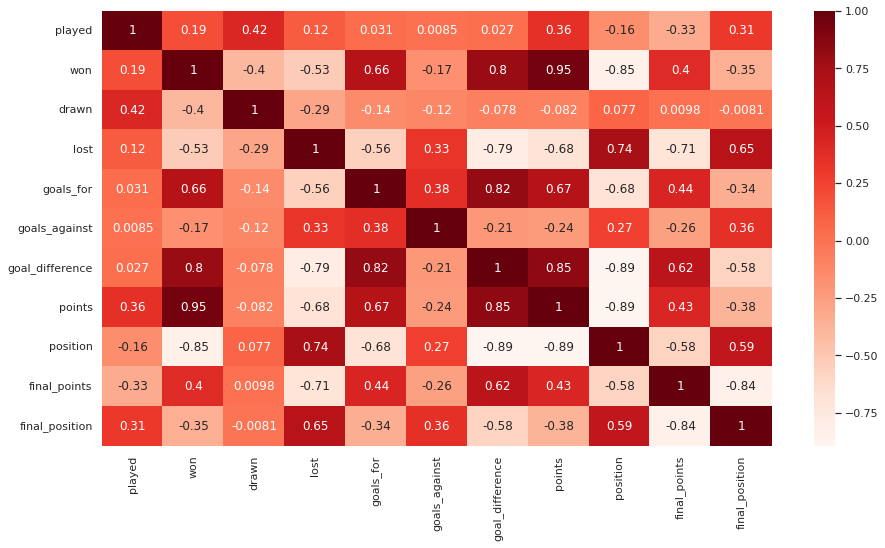

In [29]:
# Create heatmap to show correlation 
corr = df.corr()
sns.set(rc = {"figure.figsize":(15,8)})
sns.heatmap(corr, cmap = "Reds", annot = True);

## Does goals for Arsenal affect if they win or lose?

By looking at the heatmap it looks like goals for Arsenal have a moderate positive correlation with games won and a moderate negative correlation with games lost.

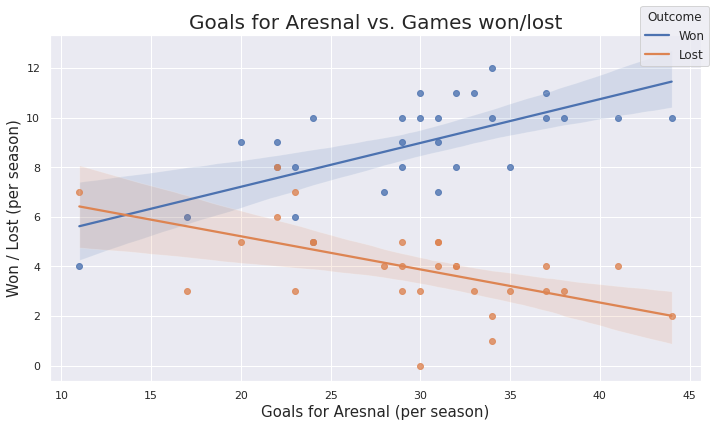

In [41]:
# Showing the correlations of games won/points and games lost/points through a plot 
fig = plt.figure(figsize = (10,6))
won = sns.regplot(data = df, x = "goals_for", y = "won")
loss = sns.regplot(data = df, x="goals_for", y = "lost")
won.set_title("Goals for Aresnal vs. Games won/lost",fontsize = 20)
won.set_xlabel("Goals for Aresnal (per season)", fontsize = 15)
won.set_ylabel("Won / Lost (per season)", fontsize = 15)
fig.legend(title = "Outcome" , labels = ["Won","Lost"], fontsize = 12);
fig.tight_layout()
fig.savefig("output.jpg")



This graph also shows that as goals for Arsenal that season increase so do wins and when goals for decreases so do losses.